# Feature Importance Determination

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from data_optimizer import *

/var/folders/qj/g4s4jm7x70389ln8d9r41my00000gn/T/ipykernel_9815/240120986.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Determine Important Features

In [2]:
RANDOM_STATE = 42

df = pd.read_csv("/Users/deniskrylov/Developer/TestingProject/data/investigation_train_large_checked.csv")
df.head()

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn,Ja,Nee,checked
0,1,1,0,0,23240,1,0,0,0,0,...,1,0,0,0,0,0,0,0.617698,0.382302,False
1,4,2,1,1,1971,1,0,0,1,0,...,1,0,1,0,1,0,0,0.602167,0.397833,False
2,6,4,2,1,7247,0,0,0,1,0,...,1,0,1,0,0,0,0,0.512377,0.487623,False
3,3,2,0,1,8060,1,0,0,1,0,...,1,0,0,0,0,0,0,0.717796,0.282204,True
4,3,2,0,0,18705,1,0,0,0,0,...,1,0,1,0,0,0,0,0.705484,0.294516,True


In [3]:
# Checking for null values
df.isnull().sum()/len(df)*100

adres_aantal_brp_adres                      0.0
adres_aantal_verschillende_wijken           0.0
adres_aantal_verzendadres                   0.0
adres_aantal_woonadres_handmatig            0.0
adres_dagen_op_adres                        0.0
                                           ... 
typering_transport__logistiek___tuinbouw    0.0
typering_zorg__schoonmaak___welzijn         0.0
Ja                                          0.0
Nee                                         0.0
checked                                     0.0
Length: 318, dtype: float64

In [4]:
# Normalize the data
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [5]:
X = df_norm.drop(['checked', 'Ja', 'Nee'], axis=1)
y = df_norm['checked']

In [6]:
# feature_importance = evaluate_importance(X, y, random_state=RANDOM_STATE)
with open('feature_importance.pkl', 'rb') as f:
    feature_importance = pickle.load(f)

/var/folders/qj/g4s4jm7x70389ln8d9r41my00000gn/T/ipykernel_9815/883120247.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


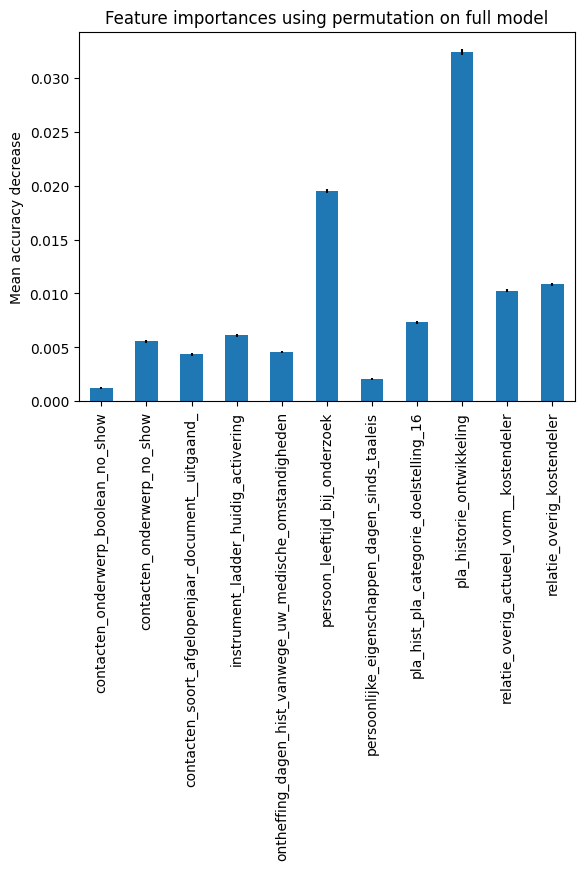

In [7]:
feature_names = X.columns
norm_feature_importance = normalize_importance(feature_importance.importances_mean)

threshold = feature_importance.importances_mean > 0.001
filtered_feature_mean = feature_importance.importances_mean[threshold]
filtered_feature_std = feature_importance.importances_std[threshold]
filtered_feature_names = feature_names[threshold]

importances_mean = pd.Series(filtered_feature_mean, index=filtered_feature_names)

fig, ax = plt.subplots()
importances_mean.plot.bar(yerr=filtered_feature_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [8]:
description = pd.read_csv("/Users/deniskrylov/Developer/TestingProject/data/data_description.csv", encoding='latin1')
description.head()

,ID,Feature (nl),Feature (en),Datatype,Relative importance,Variable description,Additional explanation
0,1,adres_aantal_brp_adres,address_number_personal_records_database_addre...,int,6.370792,"Number of different addresses of a customer, p...",NaN
1,2,adres_aantal_verschillende_wijken,address_number_different_districts,int,1.864204,Number of different neighborhoods a customer h...,NaN
2,3,adres_aantal_verzendadres,address_number_mail_address,int,4.679638,"Number of different addresses of a customer, p...",NaN
3,4,adres_aantal_woonadres_handmatig,address_number_residential_address_manual,int,2.385514,"Number of different addresses of a customer, p...",NaN
4,5,adres_dagen_op_adres,address_days_at_address,int,23.329141,Number of days a customer lives at the current...,NaN


/var/folders/qj/g4s4jm7x70389ln8d9r41my00000gn/T/ipykernel_9815/4068812576.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


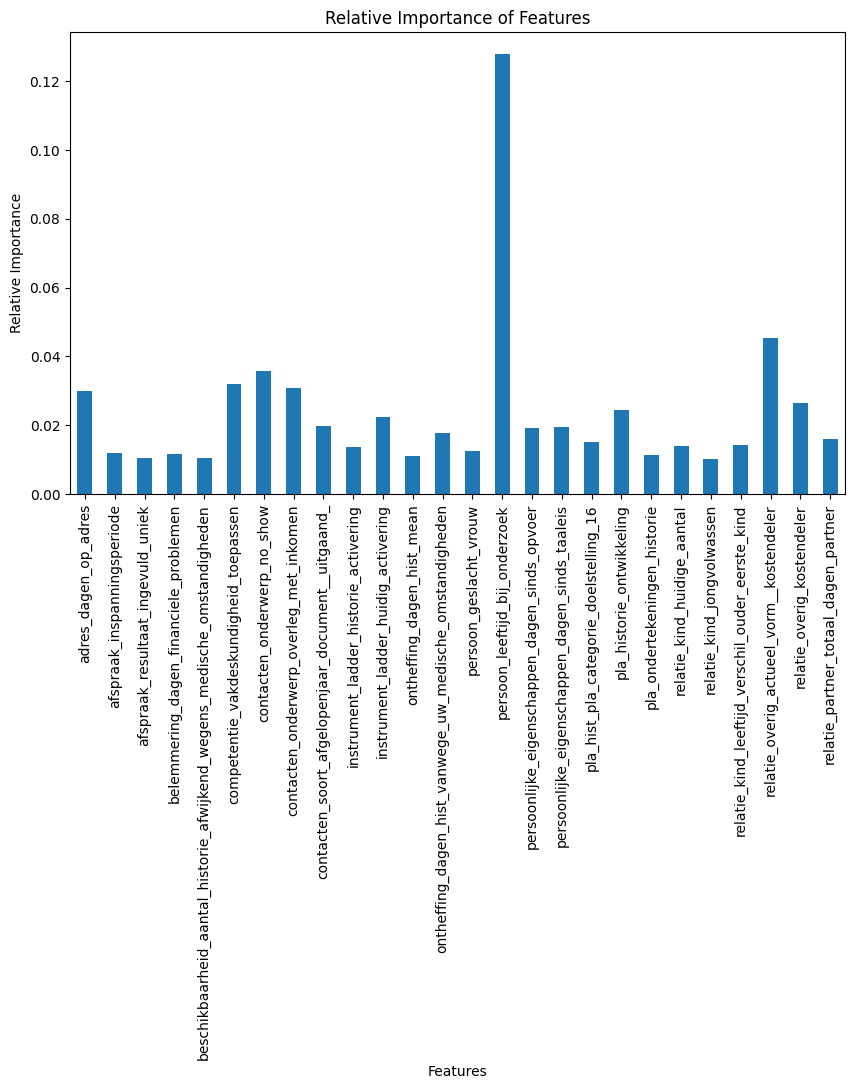

In [9]:
description['Relative importance'] = normalize_importance(description[['Relative importance']])
filtered_description = description[description['Relative importance'] > 0.01]

plt.figure(figsize=(10, 6))
ax = filtered_description['Relative importance'].plot(kind='bar')
ax.set_xticklabels(filtered_description['Feature (nl)'], rotation=90)
plt.title('Relative Importance of Features')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

In [10]:
sort_indx = np.argsort(importances_mean)[::-1]
importances_mean = importances_mean[sort_indx]
filtered_feature_names = filtered_feature_names[sort_indx]
print(filtered_feature_names)

filtered_description = filtered_description.sort_values(by='Relative importance', ascending=False)
filtered_description = filtered_description['Feature (nl)'][:len(filtered_feature_names)]
print(filtered_description)

Index(['pla_historie_ontwikkeling', 'persoon_leeftijd_bij_onderzoek',
       'relatie_overig_kostendeler',
       'relatie_overig_actueel_vorm__kostendeler',
       'pla_hist_pla_categorie_doelstelling_16',
       'instrument_ladder_huidig_activering', 'contacten_onderwerp_no_show',
       'ontheffing_dagen_hist_vanwege_uw_medische_omstandigheden',
       'contacten_soort_afgelopenjaar_document__uitgaand_',
       'persoonlijke_eigenschappen_dagen_sinds_taaleis',
       'contacten_onderwerp_boolean_no_show'],
      dtype='object')
216                       persoon_leeftijd_bij_onderzoek
290             relatie_overig_actueel_vorm__kostendeler
140                          contacten_onderwerp_no_show
90                competentie_vakdeskundigheid_toepassen
142              contacten_onderwerp_overleg_met_inkomen
4                                   adres_dagen_op_adres
299                           relatie_overig_kostendeler
276                            pla_historie_ontwikkeling
181    

/var/folders/qj/g4s4jm7x70389ln8d9r41my00000gn/T/ipykernel_9815/3040677568.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  importances_mean = importances_mean[sort_indx]


In [11]:
most_important_features_new = set(filtered_feature_names)
most_important_features_original = set(filtered_description)

intersection = most_important_features_original.intersection(most_important_features_new)
percentage_intersection = len(intersection) / len(most_important_features_original) * 100
print(f"Percentage of intersection: {percentage_intersection:.2f}%")

Percentage of intersection: 72.73%
